In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 3.8
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r3.8_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r3.8.csv", delimiter=" ")

menor1 = menor[:3944]
menor2 = menor[4237:]

list1 = list_of_x0[:3944]
list2 = list_of_x0[4237:]

print(list1.shape,list2.shape)

menor=np.vstack((menor1,menor2))
list_of_x0=np.hstack((list1,list2))


(3944,) (45763,)


In [2]:


def turnintoarray(erro_list,d):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),d)
    return erro_array

    
def geterrors(FUTUREerror):
    
    a = abs(FUTUREerror)
    b = FUTUREerror**2
    
    mae = []
    mse = []
    rmse = []
    
    for i in range(FUTUREerror.shape[1]):
        mae.append(np.sum(a,axis=0)[i]/FUTUREerror.shape[0])
        mse.append(np.sum(b,axis=0)[i]/FUTUREerror.shape[0])
        rmse.append(np.sqrt(np.sum(b,axis=0)[i]/FUTUREerror.shape[0]))
        
   
    
    return mae,mse,rmse

In [3]:


future_error = []
future_error2d = []
future_error3d = []
future_error4d = []



for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    future_t = np.zeros((10))
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 20
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    future_error.append(prediction.flatten()-data[trainlen:trainlen+future])
    if error<0.1 and error>=0.01:
        future_error2d.append(prediction.flatten()-data[trainlen:trainlen+future])
    elif error<0.01 and error>=0.001:
        future_error3d.append(prediction.flatten()-data[trainlen:trainlen+future])
    elif error<0.001:
        future_error4d.append(prediction.flatten()-data[trainlen:trainlen+future])

    
    
    

0 test error: 0.22325339655035775
1 test error: 0.0508065855904518
2 test error: 0.018892672052293894
3 test error: 0.08211441534044206
4 test error: 0.1544951437998962
5 test error: 0.1632826821974182
6 test error: 0.012400527672911712
7 test error: 0.06422814618098827
8 test error: 0.21042439300308974
9 test error: 0.011333087762268062
10 test error: 0.006919243197006486
11 test error: 0.021248820637951662
12 test error: 0.012820049479133698
13 test error: 0.03707570956008722
14 test error: 0.014567383792046276
15 test error: 0.15361598801046772
16 test error: 0.022564036421161778
17 test error: 0.021400207823750083
18 test error: 0.07242181953553412
19 test error: 0.020953283010160147
20 test error: 0.029724443595488096
21 test error: 0.0015987811885559092
22 test error: 0.04398142944529183
23 test error: 0.16604068793721505
24 test error: 0.034536631468246905
25 test error: 0.08698794489749109
26 test error: 0.07046664863240651
27 test error: 0.12377474275573476
28 test error: 0.04

230 test error: 0.018507057194990045
231 test error: 0.0024913542929434714
232 test error: 0.05518381728712769
233 test error: 0.0020851623310575865
234 test error: 0.017463055423973403
235 test error: 0.09750287024909664
236 test error: 0.04496920256332165
237 test error: 0.0605671952253879
238 test error: 0.026991602327730676
239 test error: 0.030096603781759886
240 test error: 0.03970886368328538
241 test error: 0.044210384564724335
242 test error: 0.001550005378002336
243 test error: 0.2008767407330567
244 test error: 0.05445946270446254
245 test error: 0.01729056782640417
246 test error: 0.002484979853667976
247 test error: 0.005492479498760412
248 test error: 0.11901729586377277
249 test error: 0.11340387339934757
250 test error: 0.027665129256641427
251 test error: 0.10495884283803401
252 test error: 0.07488289898598562
253 test error: 0.015883502764818012
254 test error: 0.06758235556889347
255 test error: 0.13869774036923418
256 test error: 0.018415575413433288
257 test error:

456 test error: 0.03407597118198986
457 test error: 0.02730441393122132
458 test error: 0.09241011584868142
459 test error: 0.017213980197041345
460 test error: 0.14656164916134287
461 test error: 0.0684167916630116
462 test error: 0.0075713078351598165
463 test error: 0.01585290275179393
464 test error: 0.08161678448308704
465 test error: 0.040227607877550725
466 test error: 0.004258254680603814
467 test error: 0.13944886912301382
468 test error: 0.017779204783191428
469 test error: 0.005786029943831074
470 test error: 0.06687143620404716
471 test error: 0.06799764792792495
472 test error: 0.02685501285819791
473 test error: 0.09082465758220203
474 test error: 0.018416764535315978
475 test error: 0.019483054424504855
476 test error: 0.11919327076690997
477 test error: 0.0015523798451559587
478 test error: 0.12722791279972268
479 test error: 0.17036279798201442
480 test error: 0.017470511448001835
481 test error: 0.13524917368882747
482 test error: 0.026597315265807445
483 test error: 

683 test error: 0.14812238770136646
684 test error: 0.09905642920673198
685 test error: 0.05071777426640093
686 test error: 0.022462091235555755
687 test error: 0.008034209053199008
688 test error: 0.07862565062176756
689 test error: 0.017574081492165196
690 test error: 0.04691849607465977
691 test error: 0.01769869432723972
692 test error: 0.01651716015216115
693 test error: 0.06725136280648142
694 test error: 0.02960595418502665
695 test error: 0.10981804600749921
696 test error: 0.03991650543154146
697 test error: 0.0040595264875920205
698 test error: 0.1157757701212051
699 test error: 0.10348353511697811
700 test error: 0.13103402903564954
701 test error: 0.008254454469779028
702 test error: 0.016560560554727106
703 test error: 0.07626479232776322
704 test error: 0.014775903142402737
705 test error: 0.030890395910661082
706 test error: 0.09546609828040604
707 test error: 0.05731121829287183
708 test error: 0.03292363751488416
709 test error: 0.04454663768090556
710 test error: 0.18

909 test error: 0.04992523198185328
910 test error: 0.055252187655473614
911 test error: 0.019320061496006558
912 test error: 0.010068897344617033
913 test error: 0.021818606714779577
914 test error: 0.002641011552099317
915 test error: 0.08264313298944163
916 test error: 0.020914308101279182
917 test error: 0.07902273065713086
918 test error: 0.05152426857407905
919 test error: 0.04222332035403466
920 test error: 0.031499454811890884
921 test error: 0.022403475988160722
922 test error: 0.005783902573900439
923 test error: 0.0226501497659418
924 test error: 0.08342270740162738
925 test error: 0.13578865120764402
926 test error: 0.12826235374050746
927 test error: 0.005087041987848168
928 test error: 0.0646635319766697
929 test error: 0.03348117399125103
930 test error: 0.044433923737940605
931 test error: 0.03193419461094253
932 test error: 0.07451239360891848
933 test error: 0.0038288173251515077
934 test error: 0.014269883390142603
935 test error: 0.05950357079965149
936 test error: 

1132 test error: 0.0029997478478362553
1133 test error: 0.054723147659729965
1134 test error: 0.010946755273771213
1135 test error: 0.05673716891266906
1136 test error: 0.05457787045880006
1137 test error: 0.07470258406519086
1138 test error: 0.16644223879746795
1139 test error: 0.11382257176314603
1140 test error: 0.08070477948859152
1141 test error: 0.07260466659339591
1142 test error: 0.05906326328339834
1143 test error: 0.13016749600195562
1144 test error: 0.017916173053595108
1145 test error: 0.003674488364195631
1146 test error: 0.040550796391075596
1147 test error: 0.0375041156606538
1148 test error: 0.0513418020332111
1149 test error: 0.00793548631030512
1150 test error: 0.07922695202239595
1151 test error: 0.06149744283270103
1152 test error: 0.1642551045532343
1153 test error: 0.006246126595353254
1154 test error: 0.02015978037016622
1155 test error: 0.06246231073019401
1156 test error: 0.025067833500909454
1157 test error: 0.028769992888764168
1158 test error: 0.012612915866

1352 test error: 0.011145083363890836
1353 test error: 0.019320954822640266
1354 test error: 0.1009144588415541
1355 test error: 0.0053357056000688675
1356 test error: 0.11401504938294182
1357 test error: 0.043756086210318776
1358 test error: 0.028197476338676922
1359 test error: 0.11629626345121963
1360 test error: 0.20870917882702109
1361 test error: 0.057833984650671605
1362 test error: 0.06584977923569389
1363 test error: 0.059498054859291376
1364 test error: 0.035990035532247965
1365 test error: 0.004637167426219964
1366 test error: 0.06745088842324505
1367 test error: 0.07191579761568162
1368 test error: 0.04751180204722099
1369 test error: 0.09174801788344387
1370 test error: 0.01574154666463142
1371 test error: 0.10615506109081857
1372 test error: 0.013571490764163299
1373 test error: 0.06992037886450252
1374 test error: 0.2163051853227058
1375 test error: 0.1254679003255427
1376 test error: 0.005311977356085602
1377 test error: 0.07855633854291635
1378 test error: 0.0502184241

1573 test error: 0.021262966157456265
1574 test error: 0.0007194044585186247
1575 test error: 0.0837079040588285
1576 test error: 0.09421692735022148
1577 test error: 0.09580690946635038
1578 test error: 0.08786815952772223
1579 test error: 0.0015925035692253957
1580 test error: 0.05461808586486724
1581 test error: 0.05395891127531937
1582 test error: 0.07193270782623716
1583 test error: 0.1691774319688349
1584 test error: 0.05477583888440812
1585 test error: 0.029662002900934074
1586 test error: 0.060847643458241334
1587 test error: 0.07177968929525118
1588 test error: 0.004948293924160139
1589 test error: 0.10191893977551336
1590 test error: 0.0022720019236240636
1591 test error: 0.14521856866365063
1592 test error: 0.014481243683940988
1593 test error: 0.06553618986719853
1594 test error: 0.0853231199058068
1595 test error: 0.048799797014807494
1596 test error: 0.09629666122928685
1597 test error: 0.19537815668482963
1598 test error: 0.16144198305291474
1599 test error: 0.1726703061

1800 test error: 0.0006231241942517655
1801 test error: 0.11657189165355397
1802 test error: 0.06725697765630047
1803 test error: 0.03620802423768989
1804 test error: 0.08010361111129748
1805 test error: 0.025485003023815914
1806 test error: 0.07020716787159939
1807 test error: 0.008295977224166983
1808 test error: 0.033833219891009784
1809 test error: 0.08598377115659106
1810 test error: 0.009893474588330472
1811 test error: 0.03627971935923997
1812 test error: 0.01331531377311469
1813 test error: 0.11925486727791866
1814 test error: 0.08053700471971124
1815 test error: 0.023832879264525993
1816 test error: 0.0859921895836931
1817 test error: 0.009782457045164939
1818 test error: 0.012077930371191078
1819 test error: 0.027833238317147204
1820 test error: 0.0105265326925995
1821 test error: 0.004191763039144134
1822 test error: 0.08093662302094827
1823 test error: 0.09481190311936473
1824 test error: 0.03175012669437665
1825 test error: 0.06247310159192524
1826 test error: 0.0027498881

2020 test error: 0.019877478856935405
2021 test error: 0.021776215404436743
2022 test error: 0.001420117253325919
2023 test error: 0.057837083105298136
2024 test error: 0.08938547910376242
2025 test error: 0.12303623264076839
2026 test error: 0.049610931174023265
2027 test error: 0.06875489263243412
2028 test error: 0.0677980756798119
2029 test error: 0.06690840696918457
2030 test error: 0.015780790938122555
2031 test error: 0.08223442751835806
2032 test error: 0.03802446537932731
2033 test error: 0.11237973892388889
2034 test error: 0.03024359165709056
2035 test error: 0.0366169484878187
2036 test error: 0.1805768272249495
2037 test error: 0.04185419937607508
2038 test error: 0.07001322854450834
2039 test error: 0.007540423912992733
2040 test error: 0.002570040191098926
2041 test error: 0.22644847086436862
2042 test error: 0.061026131783844376
2043 test error: 0.05756091421472757
2044 test error: 0.020863883260176415
2045 test error: 0.004346739365950173
2046 test error: 0.01309416362

2241 test error: 0.007979918537992257
2242 test error: 0.06887175691300133
2243 test error: 0.010242245917160919
2244 test error: 0.01263122485741309
2245 test error: 0.002456856077025701
2246 test error: 0.14991063448042619
2247 test error: 0.025352946014841657
2248 test error: 0.03666184536816173
2249 test error: 0.09856116399462736
2250 test error: 0.07581501691799677
2251 test error: 0.08881085514581274
2252 test error: 0.11758103874334956
2253 test error: 0.13021388995948277
2254 test error: 0.04413806031160407
2255 test error: 0.03560287162232802
2256 test error: 0.11082081864363234
2257 test error: 0.07092985033277026
2258 test error: 0.028224918763142662
2259 test error: 0.0602679833647957
2260 test error: 0.06675311949254155
2261 test error: 0.0525532657156222
2262 test error: 0.07000272052842617
2263 test error: 0.01781631631675351
2264 test error: 0.039398104590960346
2265 test error: 0.19658516700483863
2266 test error: 0.18549029427410338
2267 test error: 0.052672700737601

2462 test error: 0.09146644203256886
2463 test error: 0.04445998702555069
2464 test error: 0.1289193632898492
2465 test error: 0.07459808508449262
2466 test error: 0.0830096154654856
2467 test error: 0.03176653028443668
2468 test error: 0.01704482911712164
2469 test error: 0.10046349544163839
2470 test error: 0.06045691887933147
2471 test error: 0.05876851877133482
2472 test error: 0.047286945989298466
2473 test error: 0.014644515412232533
2474 test error: 0.07918687460462695
2475 test error: 0.06858899208413463
2476 test error: 0.18262723372147763
2477 test error: 0.002913629842755957
2478 test error: 0.16046574923981224
2479 test error: 0.0014463832770119642
2480 test error: 0.04085859341095123
2481 test error: 0.14665587057475643
2482 test error: 0.17149960506282402
2483 test error: 0.008756164261831137
2484 test error: 0.08899900269430815
2485 test error: 0.12046959109871944
2486 test error: 0.05066810964579336
2487 test error: 0.20147301076187887
2488 test error: 0.001237446801183

2683 test error: 0.0024368228999891465
2684 test error: 0.09511648989095109
2685 test error: 0.013846039901542647
2686 test error: 0.062438475249602894
2687 test error: 0.024054547457885586
2688 test error: 0.04884721901218994
2689 test error: 0.02968574766384512
2690 test error: 0.031590895099143146
2691 test error: 0.0031084319040787737
2692 test error: 0.09129437404479235
2693 test error: 0.16436281236469621
2694 test error: 0.00822713737189267
2695 test error: 0.02172168683181402
2696 test error: 0.08905910532298794
2697 test error: 0.0649340258329934
2698 test error: 0.040597375647787204
2699 test error: 0.0024819521743689008
2700 test error: 0.15716028747216676
2701 test error: 0.032485542442685006
2702 test error: 0.09122093031066109
2703 test error: 0.012201513144902261
2704 test error: 0.003785006543373769
2705 test error: 0.026362518394228672
2706 test error: 0.1816937335894912
2707 test error: 0.05635649799605611
2708 test error: 0.08339015052003115
2709 test error: 0.040873

2904 test error: 0.023403058933265445
2905 test error: 0.07085709046849853
2906 test error: 0.05810674787321344
2907 test error: 0.17992021431203725
2908 test error: 0.031663002481759156
2909 test error: 0.0687186096090813
2910 test error: 0.07622285053360962
2911 test error: 0.09021902596705343
2912 test error: 0.0992238307289637
2913 test error: 0.04046604210382407
2914 test error: 0.11209124718576391
2915 test error: 0.05546348984145415
2916 test error: 0.030381387193920428
2917 test error: 0.03208549405422882
2918 test error: 0.03923236078071517
2919 test error: 0.07172864690684527
2920 test error: 0.0147482394836584
2921 test error: 0.025813911145408486
2922 test error: 0.04815410439558213
2923 test error: 0.027846732034228844
2924 test error: 0.08511105324041889
2925 test error: 0.018300847384199063
2926 test error: 0.051351906544029824
2927 test error: 0.07243253970853664
2928 test error: 0.09921211037544882
2929 test error: 0.0828040485918156
2930 test error: 0.2279302013857215

3125 test error: 0.174331606335245
3126 test error: 0.08081599221892362
3127 test error: 0.08354800790603263
3128 test error: 0.06271170987749304
3129 test error: 0.1949984854288247
3130 test error: 0.02943749997836558
3131 test error: 0.02107680348823113
3132 test error: 0.01225344573413557
3133 test error: 0.012489863806541436
3134 test error: 0.03321924528601646
3135 test error: 0.031242856876875037
3136 test error: 0.06541203989330588
3137 test error: 0.09835487928228422
3138 test error: 0.023797758345003993
3139 test error: 0.018001430089445096
3140 test error: 0.08034076040191164
3141 test error: 0.16993608271463262
3142 test error: 0.009214106112993852
3143 test error: 0.06064258054075273
3144 test error: 0.041106335620237106
3145 test error: 0.005750126168280057
3146 test error: 0.07341690133788066
3147 test error: 0.08617918128434716
3148 test error: 0.05497476644325206
3149 test error: 0.011849307261533697
3150 test error: 0.033448776014689874
3151 test error: 0.0809111544114

3345 test error: 0.00805619138727141
3346 test error: 0.06859262363673892
3347 test error: 0.007143495813233954
3348 test error: 0.009733976502233212
3349 test error: 0.15392332865805713
3350 test error: 0.037311367616795536
3351 test error: 0.10092519440445384
3352 test error: 0.04157411943341552
3353 test error: 0.00823002879246189
3354 test error: 0.014562788063706594
3355 test error: 0.02684159526431938
3356 test error: 0.002692672213554283
3357 test error: 0.043609309624212556
3358 test error: 0.038729037125999816
3359 test error: 0.02739873657661006
3360 test error: 0.09061039036341104
3361 test error: 0.031605405916043605
3362 test error: 0.09176702637318483
3363 test error: 0.025175141923084805
3364 test error: 0.005462247811126241
3365 test error: 0.032554838792572004
3366 test error: 0.19036309602810225
3367 test error: 0.010774819999614165
3368 test error: 0.04688189139121268
3369 test error: 0.04598484117963913
3370 test error: 0.03350757258483151
3371 test error: 0.0428099

3567 test error: 0.07019493693014672
3568 test error: 0.03677744163028696
3569 test error: 0.03086899415023981
3570 test error: 0.07167976013940572
3571 test error: 0.04362866993580863
3572 test error: 0.033202330574501025
3573 test error: 0.0134268476530575
3574 test error: 0.15235626200545327
3575 test error: 0.016534288502644406
3576 test error: 0.031059358777704504
3577 test error: 0.09767762675512777
3578 test error: 0.18418801180414507
3579 test error: 0.02699229089727623
3580 test error: 0.019474122365276847
3581 test error: 0.01109559005659012
3582 test error: 0.08499269311896482
3583 test error: 0.021088198091134207
3584 test error: 0.03219603028025837
3585 test error: 0.0020423575007884383
3586 test error: 0.007240990432665691
3587 test error: 0.019263532502201117
3588 test error: 0.10451724527641071
3589 test error: 0.17958754369669902
3590 test error: 0.02604673569824715
3591 test error: 0.0027684565107057046
3592 test error: 0.003726364146977795
3593 test error: 0.11591347

3787 test error: 0.022079212033846614
3788 test error: 0.13457013480276173
3789 test error: 0.030450427288767446
3790 test error: 0.05519936543725131
3791 test error: 0.11270691453992791
3792 test error: 0.08082027468896644
3793 test error: 0.015008561666061127
3794 test error: 0.23366507794036473
3795 test error: 0.027999364573827238
3796 test error: 0.025539426345529723
3797 test error: 0.13265572345492854
3798 test error: 0.01163618040249116
3799 test error: 0.030254132864429163
3800 test error: 0.023228015876187863
3801 test error: 0.03739555954534135
3802 test error: 0.026401856725836177
3803 test error: 0.09558975634563625
3804 test error: 0.009246115246506
3805 test error: 0.05006582202737175
3806 test error: 0.05878858550983572
3807 test error: 0.047356468704609495
3808 test error: 0.05226865218415332
3809 test error: 0.027034223569332615
3810 test error: 0.07532225368726782
3811 test error: 0.05999812271146423
3812 test error: 0.08029004964298216
3813 test error: 0.06164464519

4010 test error: 0.08907912806616892
4011 test error: 0.0040318271662933974
4012 test error: 0.00493805349334824
4013 test error: 0.02265541966199196
4014 test error: 0.06913942990589801
4015 test error: 0.0016513403755257765
4016 test error: 0.14122511640084215
4017 test error: 0.029298945832765936
4018 test error: 0.1278711578165646
4019 test error: 0.027048591471436793
4020 test error: 0.09145500163415048
4021 test error: 0.06396154683855092
4022 test error: 0.03120558047767795
4023 test error: 0.19635508171542854
4024 test error: 0.09771364365264538
4025 test error: 0.12527481849544028
4026 test error: 0.054856998682755
4027 test error: 0.06179398789189349
4028 test error: 0.040794373750611033
4029 test error: 0.007117476768458664
4030 test error: 0.0010528500433247042
4031 test error: 0.10263280355176596
4032 test error: 0.03331981745509513
4033 test error: 0.057080230815121674
4034 test error: 0.15552385918547615
4035 test error: 0.03009643992051785
4036 test error: 0.00248150572

4230 test error: 0.005229609165996465
4231 test error: 0.13202988540058475
4232 test error: 0.006437076076645648
4233 test error: 0.16634139616171018
4234 test error: 0.018810368989913936
4235 test error: 0.040109741853893925
4236 test error: 0.0033458516958971667
4237 test error: 0.026139071513501894
4238 test error: 0.019333029192553666
4239 test error: 0.09948797155601319
4240 test error: 0.0376266305300185
4241 test error: 0.07364268911951553
4242 test error: 0.005113426450454693
4243 test error: 0.1132776210810167
4244 test error: 0.20030576718709484
4245 test error: 0.07526249619366304
4246 test error: 0.022205585009800514
4247 test error: 0.18294652904130615
4248 test error: 0.06422707610027518
4249 test error: 0.017489524840900397
4250 test error: 0.035977795492995644
4251 test error: 0.0019054675450638162
4252 test error: 0.05722287517716029
4253 test error: 0.09147856947715068
4254 test error: 0.04261602409780769
4255 test error: 0.20560327002773895
4256 test error: 0.0135532

4450 test error: 0.06567059085907556
4451 test error: 0.0421078082671494
4452 test error: 0.039314227367511695
4453 test error: 0.04437344186639263
4454 test error: 0.021937759296082205
4455 test error: 0.005945747235079654
4456 test error: 0.09024263601923396
4457 test error: 0.005645212720114622
4458 test error: 0.012645042374106547
4459 test error: 0.06018979525849235
4460 test error: 0.029519984540710267
4461 test error: 0.0022478482020089874
4462 test error: 0.1009937593596906
4463 test error: 0.11714539493830901
4464 test error: 0.13093439230397771
4465 test error: 0.008305622536422749
4466 test error: 0.023790090730739157
4467 test error: 0.015797003287874894
4468 test error: 0.013866571933932263
4469 test error: 0.061258493483323254
4470 test error: 0.07422809244495036
4471 test error: 0.03392016619626713
4472 test error: 0.09933880178286877
4473 test error: 0.03354935998681792
4474 test error: 0.1517093575891454
4475 test error: 0.05369023977915322
4476 test error: 0.007548145

4670 test error: 0.01951062767456842
4671 test error: 0.09345176953025866
4672 test error: 0.04422811557709761
4673 test error: 0.04085385638063192
4674 test error: 0.14274758862086556
4675 test error: 0.05141793953177207
4676 test error: 0.12608237089846483
4677 test error: 0.0673787234012597
4678 test error: 0.0024326720077100933
4679 test error: 0.04844944631205619
4680 test error: 0.08346410032637035
4681 test error: 0.041547439261969674
4682 test error: 0.09881561139072108
4683 test error: 0.1408451486885165
4684 test error: 0.05980989964270783
4685 test error: 0.0006873900504199027
4686 test error: 0.004837528406089019
4687 test error: 0.12783480528412558
4688 test error: 0.009872095161741846
4689 test error: 0.05434040250269285
4690 test error: 0.03763227159336573
4691 test error: 0.011792612220981304
4692 test error: 0.038730202981054396
4693 test error: 0.014285420762463117
4694 test error: 0.056578215025323404
4695 test error: 0.06420941809973764
4696 test error: 0.1280707182

4890 test error: 0.15401586669023426
4891 test error: 0.024246442128301116
4892 test error: 0.030052780794913067
4893 test error: 0.1124817138403487
4894 test error: 0.11696065240159789
4895 test error: 0.11338770381389254
4896 test error: 0.019229713350481955
4897 test error: 0.039722527380231534
4898 test error: 0.006013365118614902
4899 test error: 0.12606119131401383
4900 test error: 0.03197766394717918
4901 test error: 0.1319750776943464
4902 test error: 0.0573452082315039
4903 test error: 0.10538199183096239
4904 test error: 0.04007145548989397
4905 test error: 0.018125279988909358
4906 test error: 0.15247207604140556
4907 test error: 0.02109708721052912
4908 test error: 0.018143225582338433
4909 test error: 0.10926087342393269
4910 test error: 0.028660062772096467
4911 test error: 0.11970525132126424
4912 test error: 0.0011113450941907669
4913 test error: 0.033691723997531835
4914 test error: 0.039824565733309295
4915 test error: 0.038148411016619886
4916 test error: 0.118395189

5110 test error: 0.0026100744796329744
5111 test error: 0.12029733553102383
5112 test error: 0.10420734153808664
5113 test error: 0.09801824518093567
5114 test error: 0.015638265110298595
5115 test error: 0.02059673215386372
5116 test error: 0.0611331361992718
5117 test error: 0.07393078911493306
5118 test error: 0.16433710790870618
5119 test error: 0.029772111144359046
5120 test error: 0.09013790742684286
5121 test error: 0.024001773016870443
5122 test error: 0.0921172190200195
5123 test error: 0.13204089613180087
5124 test error: 0.01569373020458588
5125 test error: 0.12024088250938454
5126 test error: 0.010308580557159856
5127 test error: 0.037131516280578876
5128 test error: 0.04754924781070503
5129 test error: 0.02425285192047658
5130 test error: 0.002319503548280542
5131 test error: 0.036409774111601
5132 test error: 0.004224311896954318
5133 test error: 0.04876101714833085
5134 test error: 0.07720730822481989
5135 test error: 0.0644508390294898
5136 test error: 0.151687147882208

5331 test error: 0.005688052858417026
5332 test error: 0.11025926453584434
5333 test error: 0.1220857563461218
5334 test error: 0.003954613517057635
5335 test error: 0.14818397560868057
5336 test error: 0.08163947013923475
5337 test error: 0.12004913740662507
5338 test error: 0.020479437148877937
5339 test error: 0.06976695352615965
5340 test error: 0.012102722781342303
5341 test error: 0.07530014973045476
5342 test error: 0.04674699865262969
5343 test error: 0.04457473842913076
5344 test error: 0.015365057726726397
5345 test error: 0.081261246916606
5346 test error: 0.00827444932475324
5347 test error: 0.04190207675306013
5348 test error: 0.09834311486052869
5349 test error: 0.09780296423190547
5350 test error: 0.015957162883964017
5351 test error: 0.01620937430331283
5352 test error: 0.0466758352679761
5353 test error: 0.03126171717103812
5354 test error: 0.07000550426652616
5355 test error: 0.11658102522940855
5356 test error: 0.026771092699292676
5357 test error: 0.1276164163604322

5551 test error: 0.030548581932421704
5552 test error: 0.03202754200902917
5553 test error: 0.011687701676451305
5554 test error: 0.0019179829398882015
5555 test error: 0.1644008210042491
5556 test error: 0.06926508964781641
5557 test error: 0.09165445771953645
5558 test error: 0.12683973140385477
5559 test error: 0.002850849619034685
5560 test error: 0.08759075614607367
5561 test error: 0.04173408161923292
5562 test error: 0.011084628306878837
5563 test error: 0.012341560478517095
5564 test error: 0.12883977165528665
5565 test error: 0.03785930319177345
5566 test error: 0.017844154186367697
5567 test error: 0.027684921170925136
5568 test error: 0.187909092487441
5569 test error: 0.11375392801958299
5570 test error: 0.027236056429402092
5571 test error: 0.05643385052817227
5572 test error: 0.02765522303524831
5573 test error: 0.22024322883124542
5574 test error: 0.03031625889028358
5575 test error: 0.12326656485151505
5576 test error: 0.12489531602308468
5577 test error: 0.131950643910

5771 test error: 0.03951674669962221
5772 test error: 0.008057220066292448
5773 test error: 0.012060824684296478
5774 test error: 0.057087310763918535
5775 test error: 0.033296810565861444
5776 test error: 0.0149264142091499
5777 test error: 0.0878031515478368
5778 test error: 0.04129277231641762
5779 test error: 0.006107732882995756
5780 test error: 0.14673531338119544
5781 test error: 0.11913940413799373
5782 test error: 0.12225265757086
5783 test error: 0.018916709157152354
5784 test error: 0.08099019186554658
5785 test error: 0.06218092448795992
5786 test error: 0.05542074703991294
5787 test error: 0.06903163448082916
5788 test error: 0.011971428236645276
5789 test error: 0.0069306494815700335
5790 test error: 0.02463936595330335
5791 test error: 0.07066865786336991
5792 test error: 0.1336191091977187
5793 test error: 0.0809061928121059
5794 test error: 0.02235621993125733
5795 test error: 0.018868344241628303
5796 test error: 0.11162834492408058
5797 test error: 0.0642368312181212

5994 test error: 0.0972563889709259
5995 test error: 0.028783522379246786
5996 test error: 0.007581469222802451
5997 test error: 0.033830441885966935
5998 test error: 0.16409429849836163
5999 test error: 0.08775244519516542
6000 test error: 0.1096196757876831
6001 test error: 0.1643040104097652
6002 test error: 0.1070754342099119
6003 test error: 0.019656985174447254
6004 test error: 0.03270265574469603
6005 test error: 0.06655652810391995
6006 test error: 0.06877924443355649
6007 test error: 0.006623392768442935
6008 test error: 0.20976311239130185
6009 test error: 0.037296759065599455
6010 test error: 0.20667049898215056
6011 test error: 0.1448025846655193
6012 test error: 0.0986494696305246
6013 test error: 0.07443093054249354
6014 test error: 0.021578480223695816
6015 test error: 0.005507866252410698
6016 test error: 0.10186569270735255
6017 test error: 0.036381851214624915
6018 test error: 0.02061046630101301
6019 test error: 0.1442273858419777
6020 test error: 0.05428243696821663

6216 test error: 0.07276202127082176
6217 test error: 0.06240617659867787
6218 test error: 0.09225014979649175
6219 test error: 0.08081519408845626
6220 test error: 0.11150652823646082
6221 test error: 0.015083103607955473
6222 test error: 0.09761240508084065
6223 test error: 0.08835832542111151
6224 test error: 0.06573912594756597
6225 test error: 0.09359949208889065
6226 test error: 0.18572916930155592
6227 test error: 0.009070187505792492
6228 test error: 0.04185006834932373
6229 test error: 0.024137882441644772
6230 test error: 0.015079731198757192
6231 test error: 0.14668804272862845
6232 test error: 0.011817262166571273
6233 test error: 0.13568509472099266
6234 test error: 0.10273828270761438
6235 test error: 0.015954412799815038
6236 test error: 0.027267477270107105
6237 test error: 0.007514145763692154
6238 test error: 0.018724881621887787
6239 test error: 0.0022393478632288227
6240 test error: 0.04420701534468831
6241 test error: 0.01927596542130197
6242 test error: 0.06797477

6437 test error: 0.01028102257076979
6438 test error: 0.035855290655566356
6439 test error: 0.10446934557071264
6440 test error: 0.06403873442439614
6441 test error: 0.023648258493510134
6442 test error: 0.08595433614900241
6443 test error: 0.004986350408603567
6444 test error: 0.07689358585802326
6445 test error: 0.03719440127666928
6446 test error: 0.031650108366254356
6447 test error: 0.13886884930562252
6448 test error: 0.011196126450424273
6449 test error: 0.07173077462896396
6450 test error: 0.13190986793843418
6451 test error: 0.006984430153549626
6452 test error: 0.01240073106869857
6453 test error: 0.20739710343247497
6454 test error: 0.0057368689807964345
6455 test error: 0.13599297840077978
6456 test error: 0.0381174736384845
6457 test error: 0.004886903621084902
6458 test error: 0.019471312221536193
6459 test error: 0.05118401307757931
6460 test error: 0.19153178130979892
6461 test error: 0.11492303797007027
6462 test error: 0.06719009179371081
6463 test error: 0.0923539080

6659 test error: 0.12455295387870742
6660 test error: 0.05952356154666611
6661 test error: 0.05107642100204951
6662 test error: 0.06584710538430841
6663 test error: 0.008594814919497552
6664 test error: 0.16317782722899576
6665 test error: 0.11272774414705825
6666 test error: 0.004243313449234648
6667 test error: 0.033146181302535556
6668 test error: 0.12080056277417159
6669 test error: 0.07710773459990253
6670 test error: 0.15097791732679844
6671 test error: 0.10320265054232347
6672 test error: 0.009181189153928801
6673 test error: 0.07902430914123713
6674 test error: 0.038257282937312
6675 test error: 0.019009155509647404
6676 test error: 0.040862499632047564
6677 test error: 0.08176877471180978
6678 test error: 0.033082469568617046
6679 test error: 0.005326453726510713
6680 test error: 0.0595014919286852
6681 test error: 0.03918116810263758
6682 test error: 0.005938507473103985
6683 test error: 0.013168655180885173
6684 test error: 0.1197939068244923
6685 test error: 0.0218900129557

6881 test error: 0.03267897563550655
6882 test error: 0.11015600175805121
6883 test error: 0.03073714994232536
6884 test error: 0.03286843916691412
6885 test error: 0.15179821142604755
6886 test error: 0.07073557498246903
6887 test error: 0.19491213745133554
6888 test error: 0.07749825257282765
6889 test error: 0.055537067947499456
6890 test error: 0.09338832864626154
6891 test error: 0.1364200833765955
6892 test error: 0.05707422073024073
6893 test error: 0.040105278975497614
6894 test error: 0.009065334185877941
6895 test error: 0.022923609512075793
6896 test error: 0.021765079543908092
6897 test error: 0.0503408782736987
6898 test error: 0.06376358247890258
6899 test error: 0.04503231251585477
6900 test error: 0.015863259925672953
6901 test error: 0.048504340278994536
6902 test error: 0.03140655777824495
6903 test error: 0.16968960104882705
6904 test error: 0.07478122259498628
6905 test error: 0.010186876737983477
6906 test error: 0.0018557608804469258
6907 test error: 0.06813992989

7103 test error: 0.014702781016253056
7104 test error: 0.01829934550775111
7105 test error: 0.007726085837685104
7106 test error: 0.018680416738881066
7107 test error: 0.03995166066745701
7108 test error: 0.01119923123757988
7109 test error: 0.010406556933827912
7110 test error: 0.1062686712958937
7111 test error: 0.03833478118626006
7112 test error: 0.05704465401843878
7113 test error: 0.006936880403487672
7114 test error: 0.002242931051599359
7115 test error: 0.2150849836064301
7116 test error: 0.07262802067822915
7117 test error: 0.12014144910104067
7118 test error: 0.04990933543509323
7119 test error: 0.013912028243176944
7120 test error: 0.09370109601875995
7121 test error: 0.0406617508792394
7122 test error: 0.03524470648221361
7123 test error: 0.11565542510998261
7124 test error: 0.011741295764260794
7125 test error: 0.0551885041492319
7126 test error: 0.00663936565718577
7127 test error: 0.23023837344088505
7128 test error: 0.032197021781183555
7129 test error: 0.00284087894682

7323 test error: 0.09648667018758356
7324 test error: 0.01133281470086483
7325 test error: 0.052857743419589036
7326 test error: 0.007645500241819617
7327 test error: 0.017347865467721848
7328 test error: 0.03330517615343835
7329 test error: 0.2228752582953461
7330 test error: 0.07335899627390445
7331 test error: 0.06705002523799605
7332 test error: 0.016480366928417093
7333 test error: 0.06553771169209967
7334 test error: 0.006089409690418108
7335 test error: 0.07046521686374342
7336 test error: 0.0069205786338174145
7337 test error: 0.05285093569260968
7338 test error: 0.0953680747776505
7339 test error: 0.0015793208122295884
7340 test error: 0.013624850119988584
7341 test error: 0.02448096061976211
7342 test error: 0.07269416865079208
7343 test error: 0.033208734747991915
7344 test error: 0.016883460339909753
7345 test error: 0.04397032756268112
7346 test error: 0.00469352444937099
7347 test error: 0.06501971429855288
7348 test error: 0.037003597896874275
7349 test error: 0.14102359

7544 test error: 0.1298074326203466
7545 test error: 0.01047701050954118
7546 test error: 0.1301085819737152
7547 test error: 0.06656569554068403
7548 test error: 0.03822289907750412
7549 test error: 0.007204337684538591
7550 test error: 0.04769326283183447
7551 test error: 0.1030428502811868
7552 test error: 0.041348076279585345
7553 test error: 0.07870539924307163
7554 test error: 0.10660611249997087
7555 test error: 0.06252075421382278
7556 test error: 0.033526511731484514
7557 test error: 0.2055971128921043
7558 test error: 0.0957925834755214
7559 test error: 0.05571938216357573
7560 test error: 0.05691878049955028
7561 test error: 0.01417543338061925
7562 test error: 0.12924064626515694
7563 test error: 0.028576086543687762
7564 test error: 0.02211086032874749
7565 test error: 0.1382740733667912
7566 test error: 0.002406909504116305
7567 test error: 0.03322189335400175
7568 test error: 0.1397730487303871
7569 test error: 0.043738014748015475
7570 test error: 0.12627309708776857
75

In [4]:
FUTUREerror = turnintoarray(future_error,future)
FUTUREerror2d = turnintoarray(future_error2d,future)
FUTUREerror3d = turnintoarray(future_error3d,future)
FUTUREerror4d = turnintoarray(future_error4d,future)
mae,mse,rmse = geterrors(FUTUREerror)
mae2d,mse2d,rmse2d = geterrors(FUTUREerror2d)
mae3d,mse3d,rmse3d = geterrors(FUTUREerror3d)
mae4d,mse4d,rmse4d = geterrors(FUTUREerror4d)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')
print('mae',mae2d,'\n mse',mse2d,'\n rmse',rmse2d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')


mae [0.0008320964594602928, 0.0009114515586633674, 0.0008752563160927127, 0.0008765161796314593, 0.0008336195861134244, 0.0008278788735044993, 0.0008196636139002038, 0.0007909408154772139, 0.0008387491890268816, 0.0012576803980683, 0.00291800356402539, 0.005124269427217629, 0.008573002367731999, 0.013864942212984437, 0.022448625214404938, 0.03582437964532789, 0.05699768667454062, 0.089207711375011, 0.13377429526051893, 0.18682491740876878] 
 mse [1.064291795765476e-06, 1.5450593254099212e-06, 1.3656977850090453e-06, 1.3677837554120977e-06, 1.2927926678889133e-06, 1.2306148489615164e-06, 1.26239209821819e-06, 1.153058435855409e-06, 1.3126868156205824e-06, 2.721659037987971e-06, 1.486020744551658e-05, 4.816885115207069e-05, 0.00013798107567038076, 0.0003762507912537267, 0.0010067305918712327, 0.002644728207290292, 0.00688177819557612, 0.016711572982739044, 0.03644572389000726, 0.06527306011946064] 
 rmse [0.0010316451888927104, 0.0012430041534161988, 0.0011686307308166448, 0.001169522875

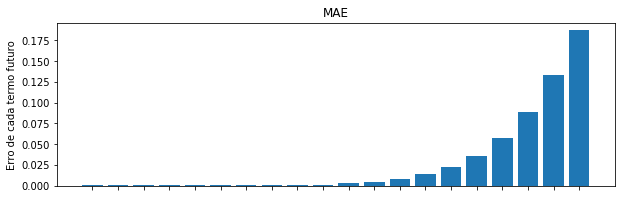

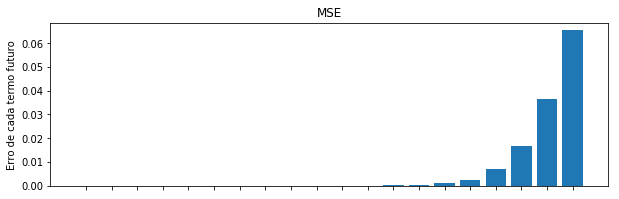

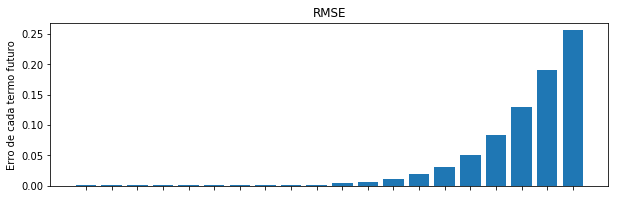

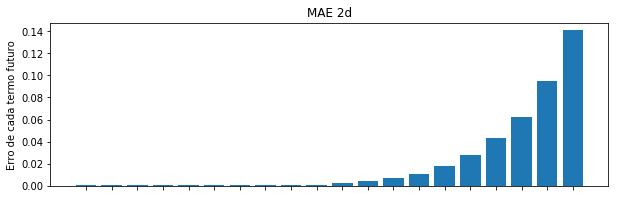

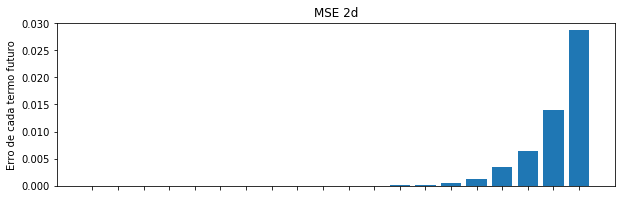

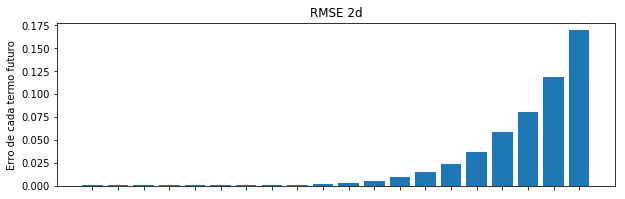

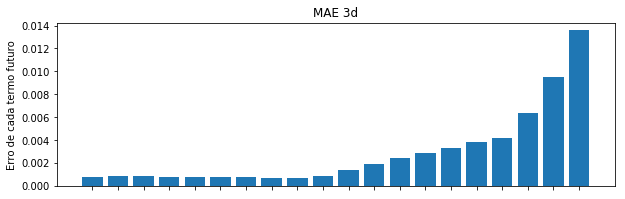

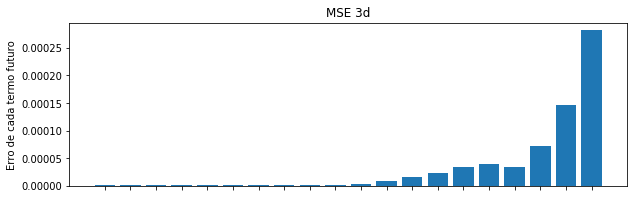

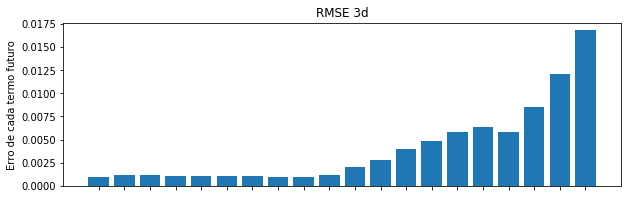

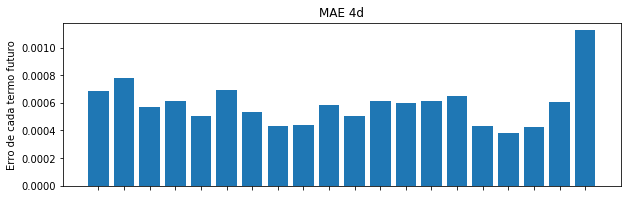

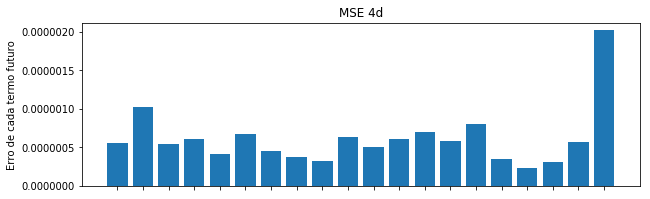

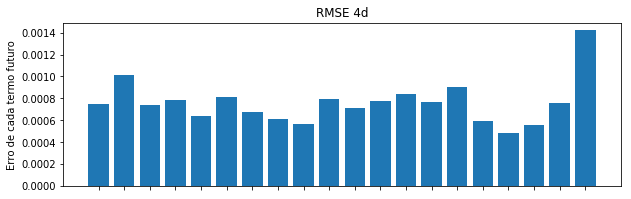

In [6]:

label = []

plt.figure(figsize=(10,3))
index = np.arange(len(mae))
plt.bar(index, mae)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse))
plt.bar(index, mse)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse))
plt.bar(index, rmse)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mae2d))
plt.bar(index, mae2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse2d))
plt.bar(index, mse2d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse2d))
plt.bar(index, rmse2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mae3d))
plt.bar(index, mae3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse3d))
plt.bar(index, mse3d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse3d))
plt.bar(index, rmse3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mae4d))
plt.bar(index, mae4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse4d))
plt.bar(index, mse4d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse4d))
plt.bar(index, rmse4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

    

In [20]:
future_error1d = []

for i in range(FUTUREerror.shape[0]):
    b = FUTUREerror**2
    if np.sqrt(np.sum(b[i])/20)>0.1:
        future_error1d.append(FUTUREerror)
    elif np.sqrt(np.sum(b[i])/20)<0.001:
        print(i,np.sqrt(np.sum(b[i])/20))

785 0.0009681839537588371
899 0.0008304424419838039
1574 0.0007194044585186247
1621 0.0009493523296093833
1783 0.0007242382195755148
1800 0.0006231241942517655
1866 0.000465412268377646
2179 0.000692864041488874
2829 0.0009241500375733214
3331 0.0008241384216409902
3825 0.0007593296354612579
3974 0.0004995089630179818
4410 0.0009545458649137934
4641 0.0007663494805164113
4685 0.0006873900504199027
5223 0.0008646742318637756
5273 0.000721127545938768
5632 0.0007498171140159178
6307 0.0009781358838736114
6407 0.0005156328880305341
6425 0.0007185322629268953
6504 0.0008963507569818898
7015 0.000902225175110615
7453 0.0007715748181656844


In [22]:
FUTUREerror1d = turnintoarray(future_error1d,future)
mae1d,mse1d,rmse1d = geterrors(FUTUREerror1d)

plt.figure(figsize=(10,3))
index = np.arange(len(mae4d))
plt.bar(index, mae1d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 1d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse4d))
plt.bar(index, mse1d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 1d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse4d))
plt.bar(index, rmse1d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 1d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

ValueError: cannot reshape array of size 257024900 into shape (1681,20)